1. Data Preprocessing

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data=pd.read_csv('statalytical_showdown.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Windows,Chrome,Delhi,Direct Traffic,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,macOS,Firefox,Delhi,Organic Search Traffic,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Android,Chrome,Pune,Paid Search Traffic,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,Linux,Firefox,Mumbai,Referral Traffic,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,Linux,Safari,Delhi,Referral Traffic,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,Android,Brave,Delhi,Direct Traffic,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,Linux,Firefox,Delhi,Affiliate Marketing Traffic,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,Linux,Firefox,Delhi,Podcast Traffic,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,macOS,Firefox,Kolkata,Content Marketing Traffic,Returning_Visitor,False,False


In [73]:
data.shape

(12330, 18)

In [74]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [75]:
data.duplicated().sum()

125

In [76]:
data.loc[data.duplicated()]
#The numerical columns record very specific values, so it is unlikely that these are unique entries. Hence, dropping them is reasonable.

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,Windows,Chrome,Delhi,Paid Search Traffic,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,Linux,Firefox,Kolkata,Paid Search Traffic,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,Linux,Firefox,Kolkata,Paid Search Traffic,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,Windows,Chrome,Delhi,Direct Traffic,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,macOS,Firefox,Bangalore,Direct Traffic,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,Windows,Chrome,Delhi,Organic Search Traffic,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,Windows,Chrome,Bangalore,Direct Traffic,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,Windows,Chrome,Delhi,Paid Search Traffic,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,Windows,Pale Moon,Pune,Community Traffic,Returning_Visitor,False,False


In [77]:
data.drop_duplicates(inplace=True)

In [78]:
data.duplicated().sum()

0

In [79]:
data.shape

(12205, 18)

2. EDA

In [80]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [81]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [82]:
#Let's replace boolean values by 1 and 0 immediately for convenience.
replace={'Weekend':{True:1,False:0},'Revenue':{True:1,False:0}}
data=data.replace(replace)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6664\875295823.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(replace)


In [83]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Windows,Chrome,Delhi,Direct Traffic,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,macOS,Firefox,Delhi,Organic Search Traffic,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,Android,Chrome,Pune,Paid Search Traffic,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,Linux,Firefox,Mumbai,Referral Traffic,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,Linux,Safari,Delhi,Referral Traffic,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,Android,Brave,Delhi,Direct Traffic,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,Linux,Firefox,Delhi,Affiliate Marketing Traffic,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,Linux,Firefox,Delhi,Podcast Traffic,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,macOS,Firefox,Kolkata,Content Marketing Traffic,Returning_Visitor,0,0


In [84]:
'''
x=False
if data.Informational.dtype==int:
    x=True
x
[True if data.Informational.dtype==int else False]'
'''

"\nx=False\nif data.Informational.dtype==int:\n    x=True\nx\n[True if data.Informational.dtype==int else False]'\n"

In [85]:
cat_cols=[col for col in data.columns if ((data[col].dtype==object) or (data[col].dtype==bool))]
cont_cols=[col for col in data.columns if col not in cat_cols]
cat_cols

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType']

In [86]:
cont_cols
#Note:Weekend, Revenue appear as continuous columns even though they are not due to their datatype. However, for our purposes, we do not need to correct this mistake.

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Weekend',
 'Revenue']

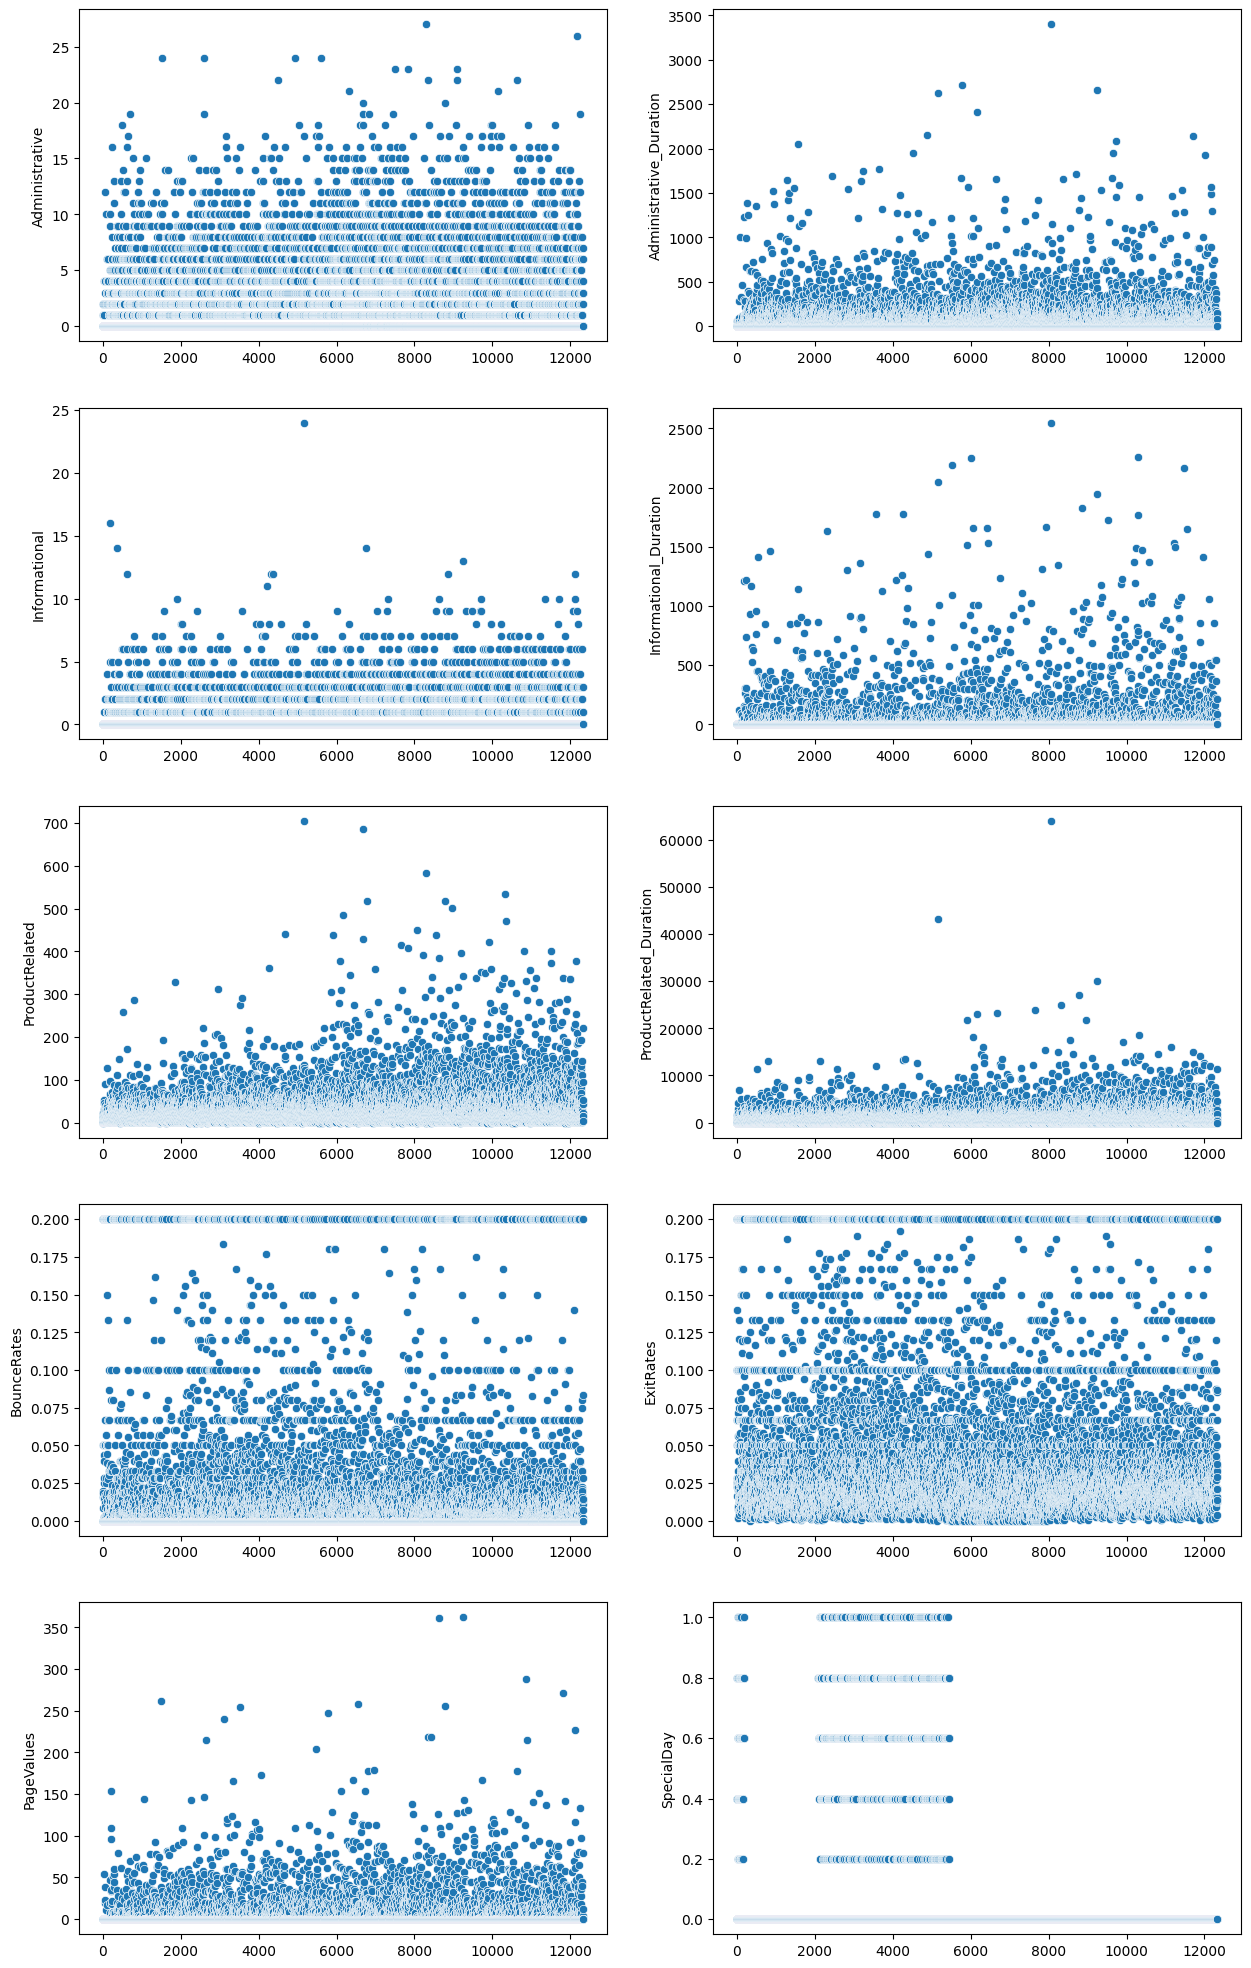

In [87]:
fig=plt.figure(figsize=(15,25))
count=0
for i in range(5):
    for j in range(2):
        col=cont_cols[count]
        plt.subplot2grid((5,2), (i,j))
        sns.scatterplot(data.loc[:,col])
        count+=1
plt.show()
#There are clearly multiple outliers, but I will remove them in the model fitting phase from only the training set in order to avoid data leakage.

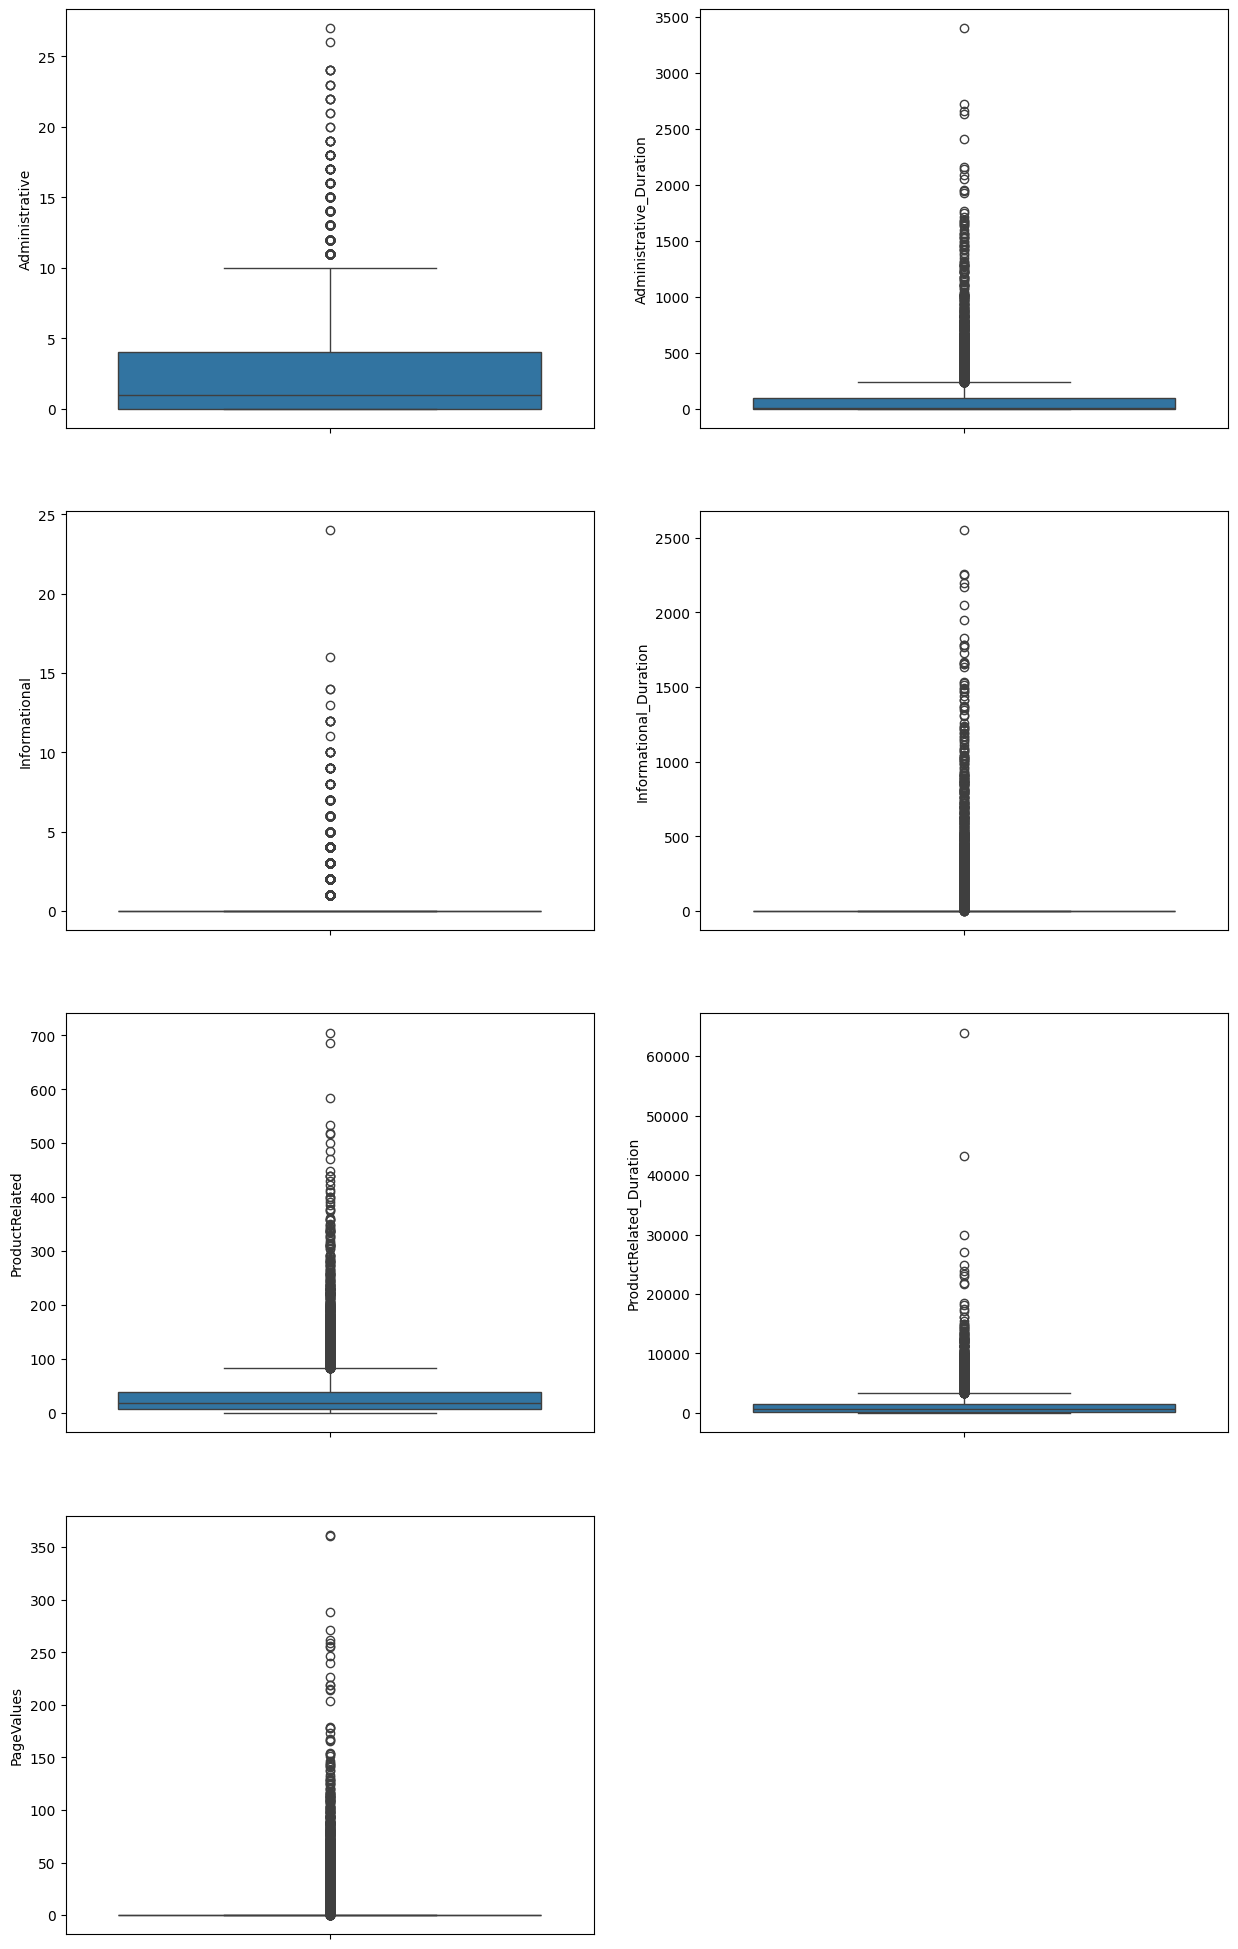

In [88]:
outlier_features=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','PageValues']
fig=plt.figure(figsize=(15,25))
for index,feature in enumerate(outlier_features):
    plot_position=int('42'+str(index+1))
    fig.add_subplot(plot_position) #so on first iteration it is fig.add_subplot(521)
    sns.boxplot(data.loc[:,feature])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6664\739423072.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


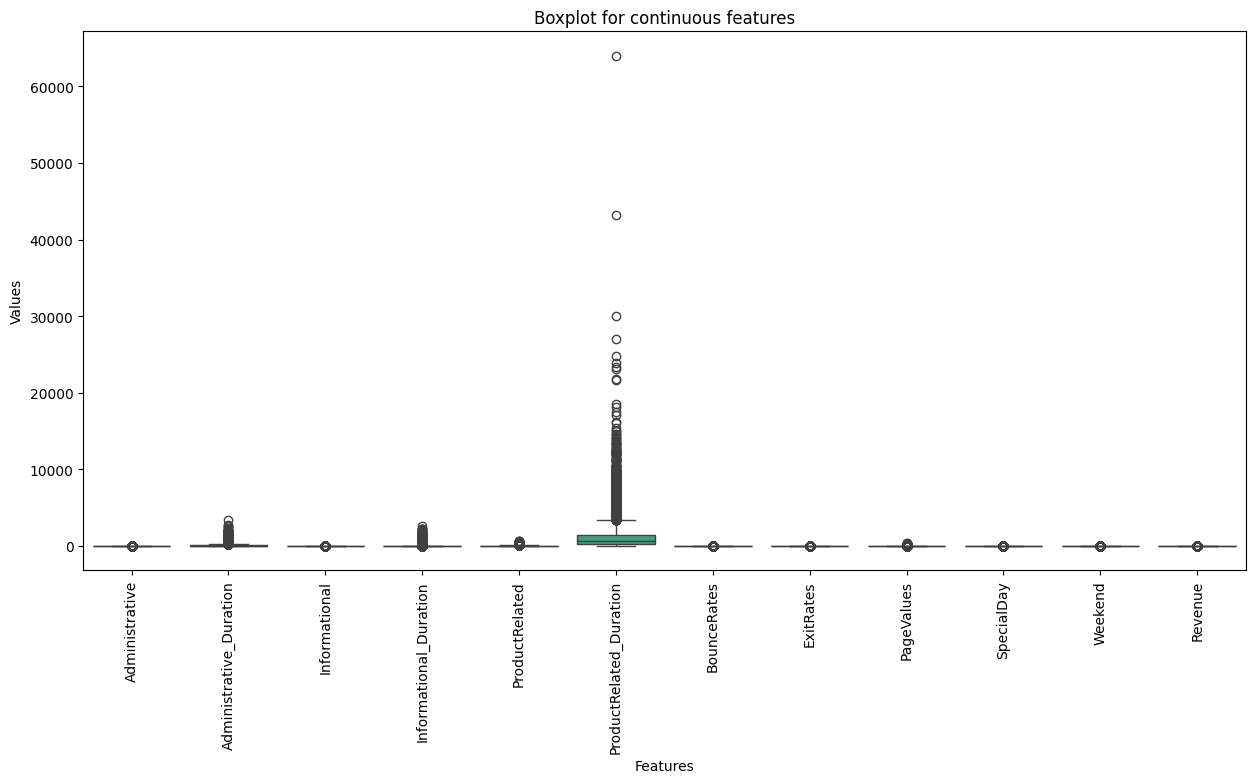

In [89]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Boxplot for continuous features')
plt.ylabel('Values')
_ = plt.xlabel('Features')

C:\Users\DELL\AppData\Local\Temp\ipykernel_6664\1259766991.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


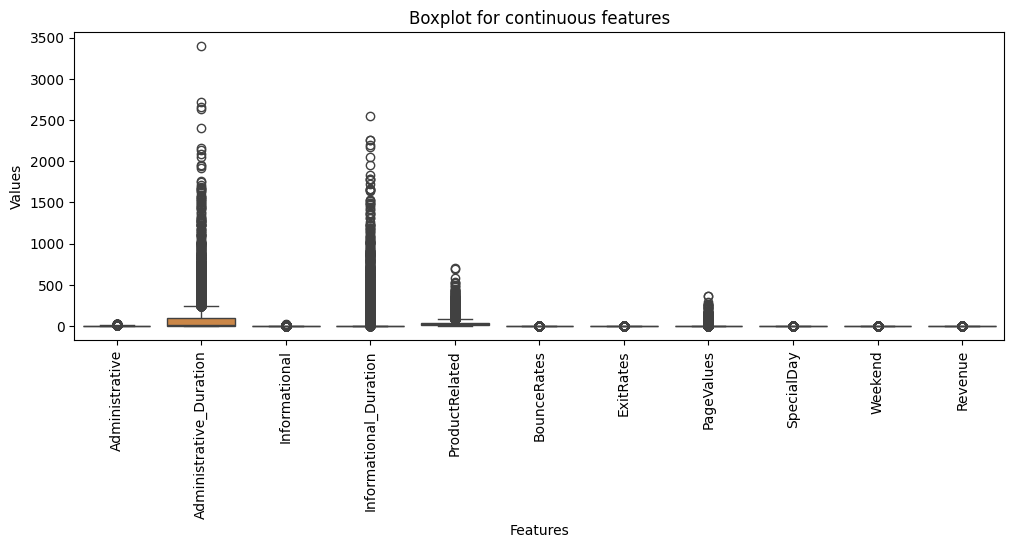

In [92]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(data=data.drop(['ProductRelated_Duration'],axis=1).drop(cat_cols,axis=1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Boxplot for continuous features')
plt.ylabel('Values')
_ = plt.xlabel('Features')

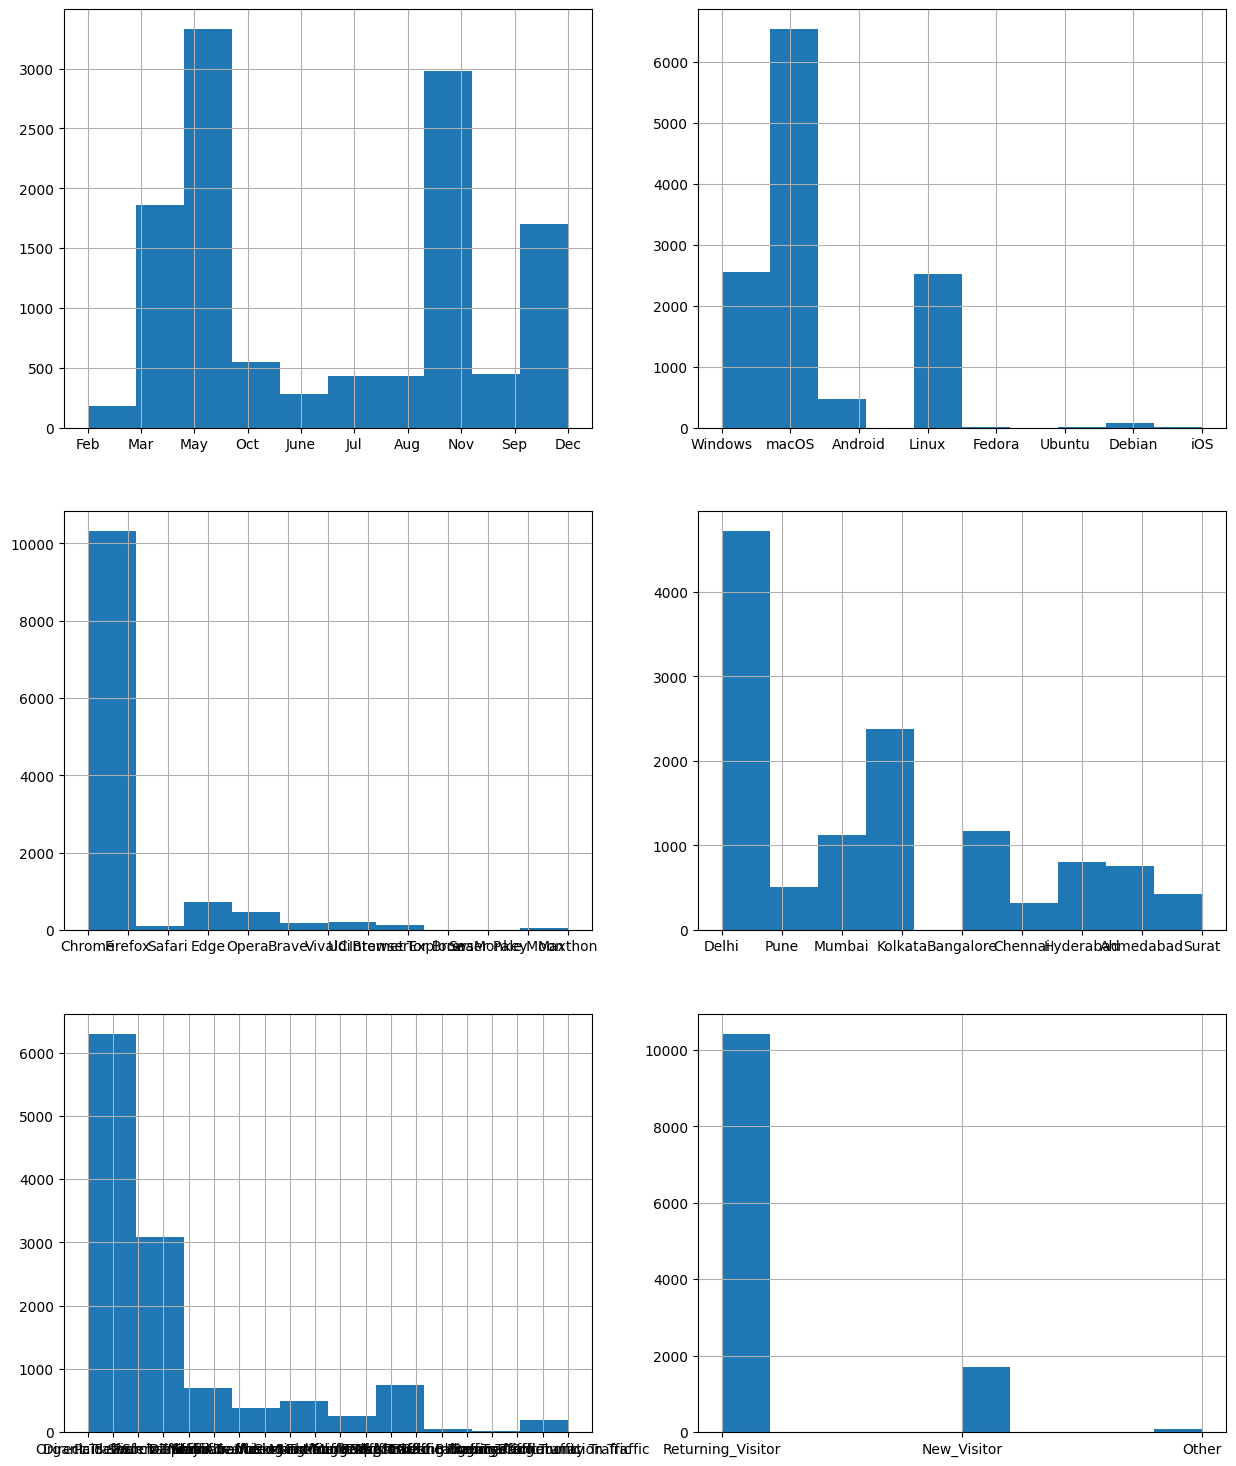

In [20]:
fig=plt.figure(figsize=(15,25))
#fig.suptitle('Scatter plots to help determine outliers')
for index,col in enumerate(cat_cols):
    plot_position=int('42'+str(index+1))
    fig.add_subplot(plot_position) #so on first iteration it is fig.add_subplot(521)
    data.loc[:,col].hist()

In [21]:
corr_matrix=data[cont_cols].corr()
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,-0.017723,-0.083601


<Axes: >

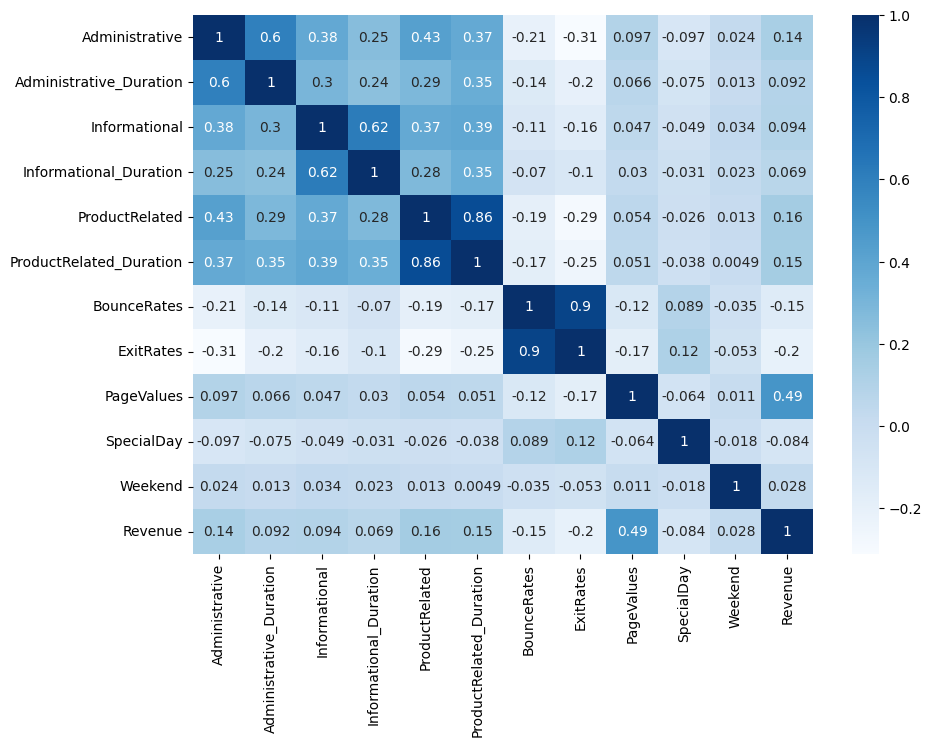

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap='Blues',annot=True)

In [23]:
#Clearly, as the feature which is by far most correlated with the target class, PageValues is the most important. So let us look at some of it's summary statistics
from statistics import mean,stdev
from scipy.stats import kurtosis,skew
print("The distribution of PageValues can be described as follows:")
print(f"Mean:{mean(data.Revenue)}, Standard Deviation:{stdev(data.Revenue)}, Skewness: {skew(data.Revenue)},Kurtosis: {kurtosis(data.Revenue)}")
print("Clearly, the data is highly skewed and platykurtic")

The distribution of PageValues can be described as follows:
Mean:0.15632937320770177, Standard Deviation:0.36318219592045553, Skewness: 1.8926297082273766,Kurtosis: 1.5820472124648477
Clearly, the data is highly skewed and platykurtic


4. Preparing the data for model fitting

In [32]:
#To fit any model, we must first do label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cat_cols:
    #training_data[i]=encoder.fit_transform(training_data[i]) 
    data[i] = data[i].map(lambda x: encoder.fit_transform([x])[0] if type(x)==str else x)

In [33]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [34]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Av_Prod_Time,Av_Informational_Time,Av_Administrative_Time
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,32.000000,0.0,0.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,1.333333,0.0,0.000000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,1,0,62.750000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,1,0,33.656447,0.0,48.333333
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,93.150000,0.0,0.000000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,30.708333,0.0,0.000000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,23.066667,0.0,18.750000


In [35]:
data.Revenue.value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data.drop('Revenue',axis=1),data.Revenue,test_size=0.8,random_state=42)

In [37]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Av_Prod_Time,Av_Informational_Time,Av_Administrative_Time
4602,0,0.000,0,0.00,6,78.666667,0.000000,0.033333,0.000000,0.0,0,0,0,0,0,0,0,13.111111,0.000000,0.0000
368,5,51.500,0,0.00,2,6.000000,0.000000,0.033333,0.000000,0.0,0,0,0,0,0,0,0,3.000000,0.000000,10.3000
12307,2,305.125,3,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,0,0,0,0,0,0,0,41.527778,122.750000,152.5625
147,0,0.000,0,0.00,4,573.000000,0.000000,0.050000,0.000000,0.0,0,0,0,0,0,0,0,143.250000,0.000000,0.0000
1708,0,0.000,0,0.00,7,370.833333,0.028571,0.057143,0.000000,0.0,0,0,0,0,0,0,0,52.976190,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12086,0,0.000,0,0.00,6,60.250000,0.033333,0.066667,0.000000,0.0,0,0,0,0,0,0,0,10.041667,0.000000,0.0000
5272,6,79.500,1,19.00,11,314.250000,0.000000,0.003333,0.000000,0.0,0,0,0,0,0,0,1,28.568182,19.000000,13.2500
5475,2,79.600,3,332.08,34,1011.016667,0.018919,0.043243,5.128358,0.0,0,0,0,0,0,0,0,29.735784,110.693333,39.8000
874,3,64.500,0,0.00,35,1334.551371,0.000000,0.007310,0.000000,0.0,0,0,0,0,0,0,1,38.130039,0.000000,21.5000


4.1 Outlier Analysis

In [38]:
print(type(X_train),type(Y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [39]:
Y_train=pd.DataFrame(Y_train,columns=['Revenue']) #Changing it to a dataframe for convenience

In [40]:
pd.concat([X_train,Y_train],axis=1).loc[X_train['ProductRelated_Duration']>10000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Av_Prod_Time,Av_Informational_Time,Av_Administrative_Time,Revenue
9971,18,1103.330357,8,696.833333,359,12959.91515,0.000796,0.008975,7.231075,0.0,...,0,0,0,0,0,0,36.100042,87.104167,61.296131,1
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,...,0,0,0,0,0,0,42.541363,63.250000,31.619850,0
8278,4,93.500000,0,0.000000,293,12268.24477,0.002838,0.015430,2.164810,0.0,...,0,0,0,0,0,0,41.871143,0.000000,23.375000,1
9195,11,298.082022,4,138.500000,397,11940.01650,0.006960,0.009804,9.221243,0.0,...,0,0,0,0,0,1,30.075608,34.625000,27.098366,1
10481,4,80.000000,0,0.000000,326,11945.62954,0.001850,0.017528,0.000000,0.0,...,0,0,0,0,0,0,36.643035,0.000000,20.000000,1
6762,1,175.480000,0,0.000000,98,12449.90000,0.002292,0.031103,0.000000,0.0,...,0,0,0,0,0,0,127.039796,0.000000,175.480000,0
11056,1,28.500000,1,0.000000,315,11232.65691,0.003165,0.019253,0.000000,0.0,...,0,0,0,0,0,0,35.659228,0.000000,28.500000,0
510,14,416.392857,6,449.333333,258,11301.20416,0.000000,0.007425,33.611792,0.0,...,0,0,0,0,0,0,43.803117,74.888889,29.742347,1
11713,5,107.666667,10,505.166667,281,14988.59151,0.008499,0.029697,0.000000,0.0,...,0,0,0,0,0,0,53.340183,50.516667,21.533333,0
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,...,0,0,0,0,0,0,57.702440,35.714286,125.120000,0


In [41]:
pd.concat([X_train,Y_train],axis=1).Revenue.value_counts()

Revenue
0    2035
1     406
Name: count, dtype: int64

In [42]:
data.loc[data.Revenue==1].ProductRelated_Duration.mean() #average of time when revenue is generated

1876.2096148889045

In [43]:
data.loc[data.Revenue==0].ProductRelated_Duration.mean() #average of time when revenue is not generated

1082.976881325396

In [44]:
X_train.loc[X_train['ProductRelated_Duration']>10000].loc[Y_train.Revenue==0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Av_Prod_Time,Av_Informational_Time,Av_Administrative_Time
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,0,0,0,0,0,0,0,42.541363,63.250000,31.619850
6762,1,175.480000,0,0.000000,98,12449.90000,0.002292,0.031103,0.000000,0.0,0,0,0,0,0,0,0,127.039796,0.000000,175.480000
11056,1,28.500000,1,0.000000,315,11232.65691,0.003165,0.019253,0.000000,0.0,0,0,0,0,0,0,0,35.659228,0.000000,28.500000
11713,5,107.666667,10,505.166667,281,14988.59151,0.008499,0.029697,0.000000,0.0,0,0,0,0,0,0,0,53.340183,50.516667,21.533333
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,0,0,0,0,0,0,0,57.702440,35.714286,125.120000


In [45]:
print(X_train.shape,Y_train.shape)

(2441, 20) (2441, 1)


In [46]:
drop_index=X_train.loc[X_train['ProductRelated_Duration']>10000].index #.loc[Y_train.Revenue==0]
X_train=X_train.drop(drop_index)
Y_train=Y_train.drop(drop_index)

In [47]:
print(X_train.shape,Y_train.shape)

(2430, 20) (2430, 1)


4.2 Correcting Target Class Imbalance

In [48]:
Y_train.value_counts()

Revenue
0          2030
1           400
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority',random_state=42)
oversampled_X,oversampled_y=sm.fit_resample(X_train, Y_train)
oversampled=pd.concat([pd.DataFrame(oversampled_X),pd.DataFrame(oversampled_y)],axis=1)

5. Model Fitting and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear') #Using liblinear solver because the target class is binary, and using the default solver was throwing a warning about maximum iterations reached.
logreg.fit(oversampled_X,oversampled_y)
logreg.score(X_test,Y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8776116345759934

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(oversampled_X,oversampled_y)
tree.score(X_test,Y_test)

0.8425850061450225

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(oversampled_X,oversampled_y)
rf.score(X_test,Y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8757681278164686

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(oversampled_X,oversampled_y)
gb.score(X_test,Y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8746415403523147

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
etf=ExtraTreesClassifier(n_estimators=200)
etf.fit(oversampled_X,oversampled_y)
etf.score(X_test,Y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8760753789430561

In [55]:
#Let us define a function for evaluating a model.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def eval_model(model,x_test,y_test):
    report=pd.DataFrame(classification_report(y_test,model.predict(x_test),output_dict=True))
    print(report)
    cm=confusion_matrix(y_test,model.predict(x_test))
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test,y_test))
    plt.title(all_sample_title, size = 15)

                     0            1  accuracy    macro avg  weighted avg
precision     0.952149     0.573388  0.875768     0.762768      0.893884
recall        0.898330     0.751664  0.875768     0.824997      0.875768
f1-score      0.924457     0.650533  0.875768     0.787495      0.882319
support    8262.000000  1502.000000  0.875768  9764.000000   9764.000000


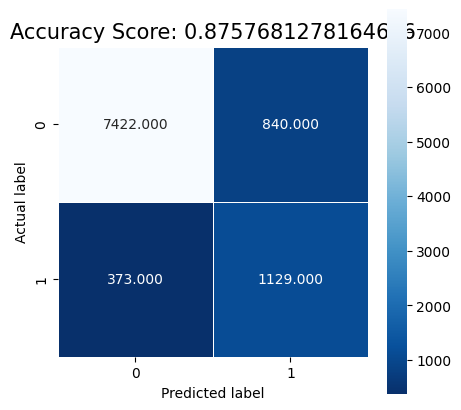

In [56]:
eval_model(rf,X_test,Y_test)

                     0            1  accuracy    macro avg  weighted avg
precision     0.955357     0.568271  0.874642     0.761814      0.895812
recall        0.893609     0.770306  0.874642     0.831958      0.874642
f1-score      0.923452     0.654042  0.874642     0.788747      0.882009
support    8262.000000  1502.000000  0.874642  9764.000000   9764.000000


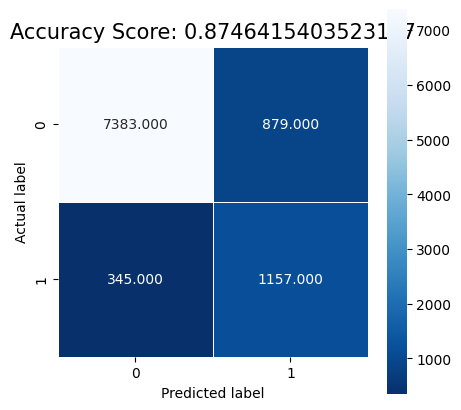

In [58]:
eval_model(gb,X_test,Y_test)

In [98]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators':[i*100 for i in range(1,5)],
    'min_samples_split': [i for i in range(2,7)],
    'min_samples_leaf': [i for i in range(2,7)], 
} #'max_depth': ([1,2,3,4,5]), 
model_finder=RandomizedSearchCV(RandomForestClassifier(),params,n_iter=50,cv=4, verbose=1, random_state=42,n_jobs=-1)
model_finder.fit(oversampled_X,oversampled_y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=1)

In [99]:
best_params=model_finder.best_params_
best_forest=RandomForestClassifier(**best_params)
best_forest.fit(oversampled_X,oversampled_y)
print(best_forest.score(oversampled_X,oversampled_y),best_forest.score(X_test,Y_test))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9743842364532019 0.8758705448586644


                     0            1  accuracy    macro avg  weighted avg
precision     0.954487     0.572211  0.875871     0.763349      0.895681
recall        0.896030     0.764980  0.875871     0.830505      0.875871
f1-score      0.924335     0.654701  0.875871     0.789518      0.882857
support    8262.000000  1502.000000  0.875871  9764.000000   9764.000000


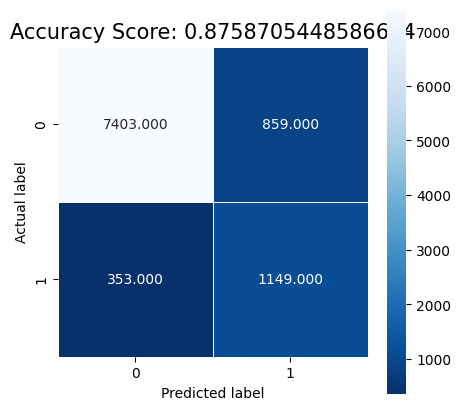

In [100]:
eval_model(best_forest,X_test,Y_test)

So our final model is best_forest, a random forest which gives 87.5 % accuracy on the test data.